##Quantum Phase Estimation

_This is a continuation of the previous [notebook](https://github.com/suvoooo/Qubits-Qiskit/blob/master/QFourierT.ipynb) on Quantum Fourier Transform. Concepts from the previous notebook will be used here_



##Prelim Concepts

### Phase Kickback

Consider an unitary operator (or a gate) acting on a qubit $|\psi\rangle$ as below 

$$U|\psi⟩ = e^{iθ}\, |\psi⟩$$, 

Let's consider a state $|\psi⟩ = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ and the outcome of measuring the state will yield 0.5 for state $|0\rangle$ and 0.5 for state $|1\rangle$. if we apply the unitary operator $U$ on this state we will get-- 

$$U|+\rangle = e^{iθ}\, |\psi⟩$$

But outcome of measuring the state will yield the same as before. This is problematic in a sense that we cannot measure the global phase simply this way. It's also better to comprehend that global phase has no physically measurable effect. 

But we will add something more-- an extra qubit, hadamard gate on this added qubit, a controlled unitary gate for this now 2 qubit system. 

So we now start again but now we have 2 qubits. 
1. Initial state $|0\rangle \otimes |\psi\rangle = |0\, \psi\rangle$. 
2. Apply the H gate to added qubit 
$$H|0\rangle |\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle|\psi\rangle + |1\rangle|\psi\rangle)$$. 
3. Now we apply the Controlled Unitary gate with first qubit at control state and state $|\psi\rangle$ as target. 

$$C(U)\otimes \frac{1}{\sqrt{2}}(|0\rangle|\psi\rangle + |1\rangle|\psi\rangle) = \frac{|0\rangle + e^{i\theta}\, |1\rangle}{\sqrt{2}}\, |\psi\rangle\, ......\, (1)$$.  

This is extremely important and what just happened is in stark contrast with normal cotrolled gate operation where something happens to the target qubit. A phase is accumulated in one component of the control qubit and this is known as **Phase Kickback**. A circuit representation would look as below

![fig](https://drive.google.com/uc?id=1WV-VmxeOKJmIBlsilxtXSV5IHQIQ9I1p)



In principle it is possible to read out the phase and we will see an example of this here. Even if a single read-out isn't enough, we repeat the steps to get a statistical estimation, since the repeated application doesn't alter the target qubit state (in figure $|\psi _k\rangle$). The other important point is that this case will be valid irrespective of the number of target states. The simplicity of using a single qubit to readout the action of an arbitrary large number of unitary operations is what makes phase kickback very important backbone of many quantum algorithms.   


**Operators and Matrices**: 

Since observables are measurable physical quantities, the eigenvalues from which they are obtained must be real. Furthermore, in order to guarantee that the eigenvalues are real, the operators corresponding to observables must be Hermitian. Also eigenvectors corresponding to distinct eigenvalues are orthogonal and there is an orthonormal basis consisting of eigenvectors. _Time evolution of these real physical systems (Hamiltonians) are unitary_.

**Building Block of Phase Estimation Circuit**

We have already discussed one very important component/concept that will be used in Quantum Phase Estimation (QPE) circuit which is phase kickback. The other one will be introduced here as a building block for QPE circuit. Let's take a look at the simple circuit below-

![fig](https://drive.google.com/uc?id=1fuoLA9iuOSlG8XxXgBMzX4tT2vghFaqX)

In the figure many wires for $|\psi\rangle$ can be thought of as $|\psi\rangle = |\psi_{n-1}, \psi_{n-2}, \ldots, \psi_{0} \rangle$ but for simply showing the result of the circuit we will go with $|\psi\rangle$. The controlled unitary gate applies a phase $\theta$ when control qubit is as $|1\rangle$. 

1. At S1: $|0\rangle \otimes |\psi\rangle = |0\, \psi\rangle$

2. At S2: 
$$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)⊗|\psi\rangle$$

3. At S3: 
$$\frac{1}{\sqrt{2}}(|0\, \psi⟩ + e^{iθ}|1\, \psi\rangle$$

4. At S4: 
$$ \begin{align} & =\frac{1}{2}\left(|0\, \psi\rangle + |1\, \psi\rangle + e^{iθ}|0\, \psi\rangle - e^{iθ}|1\, \psi\rangle \right) \\ & = \frac{1}{2}\left(|0\rangle (1+e^{iθ}) + |1\rangle (1-e^{iθ}) \right)|\psi\rangle \end{align}$$ 

Compare this with the phase kickback expression & this expression is very important in terms of determining the angle $\theta$. Let's calculate the probability of measuring 0 and 1 for the first qubit. 

$$
\begin{align}
Pr(0) &= \left|\frac{1}{2}\, (1 + e^{iθ}) \right|^2  \\
Pr(1) &= \left|\frac{1}{2}\, (1 - e^{iθ}) \right|^2
\end{align}
$$
If we start of with say $\theta = 1^{\circ}$ then the probabilities will be $Pr(0) = 0.999923, Pr(1) = 7.615\times 10^{-5}$. [Calculation is shown below](https://colab.research.google.com/drive/16rIF-MTRdjs9cjRZGY7CzQxBuE4qUdUl#scrollTo=O0rqqhZdjNYH&line=3&uniqifier=1). 

So if we repeat these experiment several times (higher the statistics better is accuracy) and check how many times we get 0 and 1 and this will help us to have an estimate on $\theta$. 

There's another way to get more precision, and that is by using more qubits in the control part. Let's check the circuit below-- 

![file](https://drive.google.com/uc?id=17AAj8SDOpeG8CRYyQsNOvaXUrT5A8V7U)

Now we have added $n$ control qubits and so as $n$ control unitary gates, so our initial state taking into account of all the the control qubits will be of the form $|0\rangle ^{\otimes n}\, |\psi\rangle$. Before we discuss the various stages of the circuit, let's see what happens if we apply the unitary gate $2^j$ times on $|\psi ⟩$ where $U|\psi⟩ = e^{2πiθ_{\psi}|\psi⟩}$ where $θ\in [0, 1]$ 

$$U^{2^j}\, |\psi\rangle = U^{2^{j-1}}\, e^{2πi θ_{\psi}}|\psi\rangle = U^{2^{j-2}}\, e^{2\pi i θ_{\psi}} \, e^{2π i θ_{\psi}}|\psi\rangle = \ldots = e^{2\pi i 2^jθ_{\psi}}|\psi\rangle \, ......\,  (1)$$

Here the rotation angle depends on $|\psi⟩$. 

1. S1: 
$$|0\rangle ^{\otimes n}\, |\psi\rangle$$ 
2. S2: 
$$\frac{1}{2^{\frac{n}{2}}}\, (|0\rangle + |1\rangle)^{⊗ n}\, |ψ⟩$$ 

3. For simplicity let's just consider application of controlled $U^{2^0}$ to the $n$th qubit of first register and second register (contains $|\psi\rangle$). Here we will also use the phase kickback algorithm that's discussed before.   

$$\begin{align} & \frac{1}{2^{\frac{1}{2}}} \left(|0\rangle + e^{2\pi i 2^0 θ} |1 \, \psi⟩\right)\otimes \, \frac{1}{2^{\frac{n-1}{2}}} \left(|0\rangle + |1\rangle\right)^{⊗ n-1} \\& \frac{1}{2^{\frac{1}{2}}} \left(|0\rangle + e^{2\pi i 2^0 θ} |1⟩\right)\,  \otimes \, \frac{1}{2^{\frac{n-1}{2}}} \left(|0\rangle + |1\rangle\right)^{⊗ n-1} |ψ\rangle \, \text{[phase kickback]} \\ & \frac{1}{2^{\frac{n}{2}}} \underbrace{\left(|0\rangle + e^{2\pi i 2^0 θ} |1⟩\right)}_{\text{nth qubit part}}\,  \otimes \, \left(|0\rangle + |1\rangle\right)^{⊗ n-1} |ψ\rangle\end{align}\, ......\, (2)$$

Using this we can write the generalized expression for the state of the first register (remember we are only interested in first register because of the phase kickback the angle only appears in the first register) after all the controlled qubit operations are performed... 

$$ \frac{1}{2^{\frac{n}{2}}} \,  \underbrace{\left(|0\rangle + e^{2\pi i 2^{n-1} θ} |1⟩\right)}_{\text{1st qubit part}}⊗   \underbrace{\left(|0\rangle + e^{2\pi i 2^{n-2} θ} |1⟩\right)}_{\text{2nd qubit part}} ⊗ \ldots ⊗  \underbrace{\left(|0\rangle + e^{2\pi i 2^{0} θ} |1⟩\right)}_{\text{nth qubit part}} = \frac{1}{2^{\frac{n}{2}}} ∑\limits _{k=0}^{2^n-1} e^{2πi\theta k} \, |k\rangle \, ......\, (3)$$ 

As the state of the second register is left physically unchanged at $|ψ⟩$ (once again we can relate this to phase kickback), we can write complete expression as--  
$$ \frac{1}{2^{\frac{n}{2}}} ∑\limits _{k=0}^{2^n-1} e^{2πi\theta k} \, |k\rangle \otimes |ψ\rangle \, ......\, (4)$$


The final summation may not seem obvious but this can be easily derived in another way. We have already discussed before results of applying $n$ hadamard gates in parallel in [Uniform Superposition](https://github.com/suvoooo/Qubits-Qiskit/blob/master/Hadamard_Superposition.ipynb) notebook.  Application of $n$ H gates in parallel would give us---

$$ H^{\otimes n} \left(|0\rangle ^{\otimes n}\right) = \frac{1}{\sqrt{2^n}} \sum \limits_{x\in \{0, 1\}^n} |x\rangle \, ......\, (5) $$, 

This can be readily compared for 2 qubits as $x\in{0, 1}$ denotes one of the states $|00⟩,\,  |01⟩,\, |10⟩,\, |11⟩$. 

With this let's look back at step 1 when we had $|0⟩^{\otimes n} |\psi\rangle$ and then we applied $n$ H gates in parallel which would give us-- 

$$\frac{|0⟩ + |1⟩}{\sqrt{2}}^{⊗ n}\, |ψ⟩  = \frac{1}{\sqrt{2^n}} \sum \limits_{x\in \{0, 1\}^n} |x\rangle |\psi⟩ = \frac{1}{\sqrt{2^n}} \sum \limits_{x =0}^{2^n - 1} |x\rangle |\psi⟩\, ......\, (6) $$. 

Now we apply the Unitary operator then we get ---

$$ \frac{1}{\sqrt{2^n}} \sum \limits_{x =0}^{2^n - 1} U^x |ψ\rangle  |x⟩ = \frac{1}{\sqrt{2^n}} \sum \limits_{x =0}^{2^n - 1} e^{2π i x θ} |ψ\rangle  |x⟩ = \left(\frac{1}{2^{\frac{n}{2}}} \sum \limits_{x =0}^{2^n - 1} e^{2π i x θ} |x⟩ \right)\, |ψ⟩\, ......\, (7) $$. 

Let's compare this with the generalized QFT expression that we have already discussed [before](https://github.com/suvoooo/Qubits-Qiskit/blob/master/QFourierT.ipynb). 

$$\text{QFT}|\psi\rangle = \text{QFT}|x_{n-1}\, x_{n-2}\, x_{n-3}\, ....\, x_{0}\rangle \mapsto \\ \begin{align}\frac{1}{\sqrt{2^n}}(|0\rangle + e^{2\pi i[0\cdot x_{n-1}]}|1\rangle) \otimes  (|0\rangle + e^{2\pi i[0\cdot x_{n-2} \cdot x_{n-1}]}|1\rangle)\otimes  \ldots \otimes (|0\rangle + e^{2\pi i[0\cdot x_0\cdot x_1\cdot ... \cdot x_{n-2} \cdot x_{n-1}]}|1\rangle)\, \end{align}\, ......\, (8)$$

Here we follow the fractional binary notation--

$$\begin{align}\frac{x_0}{2} &\rightarrow 0 \cdot x_0
 \\ \frac{x_0}{2^2} + \frac{x_1}{2} &\rightarrow 0 \cdot x_0 \cdot x_1 \\ \frac{x_0}{2^3} + \frac{x_1}{2^2} + \frac{x_2}{2} &\rightarrow 0 \cdot x_0 \cdot x_1 \cdot x_2\, \\ \left[0, x_0, x_1, \ldots , x_{n-1} \right] & \rightarrow \sum\limits_{k=0}^{n-1} x_k 2^{-k}\end{align}\, ......\, (9)$$

We remember that binary expression for $x$ be $x_1 x_2 \ldots  x_n$ where $x = x_1\, 2^{n-1} + x_2\, 2^{n-2} + \ldots + x_n\, 2^{0}$. 

And the for binary fractions $0\cdot x_1\, x_2\ldots x_n = \frac{x_1}{2} + \frac{x_2}{4} + \ldots + \frac{x_n}{2^n} = \frac{x}{2^n}$.  

The generalized QFT form can be written as --

 $$\text{QFT} |x⟩ = \frac{1}{\sqrt{N}}\, ∑\limits_{y=0}^{N-1}\, e^{\frac{2π i x y}{N}}\, |y⟩\, ......\, (10)$$. 

Here we can clearly see the uncanny similarity between the results from a QFT and the circuit that we are discussing. The expression is very similar except the phase that appears in exponent. If we replace $\theta$ in Eq. (3) with $x/N$ i.e. $x = 2^n \, θ$ we get back QFT expression. So if we apply inverse QFT in Eq. (3) we can get back the $2^n \, θ$ by applying an Inverse QFT in Eq. (3). So let's add the inverse QFT block in the circuit above for the first register and it should like as below-- 

![fig](https://drive.google.com/uc?id=1xxY8HmVO66iVYxoUlmjm-_WVH5X7wom6)

Let's apply inverse QFT to Eq. (4) ---

$$ \begin{align} &\text{QFT}^{-1} \frac{1}{2^{\frac{n}{2}}} ∑\limits _{k=0}^{2^n-1} e^{2πi\theta k} \, |k\rangle \otimes |ψ\rangle \\ & \frac{1}{2^n}\, ∑\limits _{k=0}^{2^n-1}\,  ∑\limits_{x=0}^{2^n-1}\,e^{2πi\theta k}\,  e^{\frac{-2π i x k}{2^n}}\, |x⟩\, ⊗ |ψ⟩ \\ & \frac{1}{2^n}\, ∑\limits _{k=0}^{2^n-1}\,  ∑\limits_{x=0}^{2^n-1}\,e^{2πi k\,  \left(\theta -\frac{x}{2^n}\right)}\, |x⟩\, ⊗ |ψ⟩ \end{align}$$

However, $θ$ is not in general a fraction of a power of two (and may not even be a rational number). For such a $θ$, it turns out that applying the inverse of the QFT produces the best $n$-bit approximation of $θ$ with probability at least $4/π^2 = 0.405$ 



In [1]:
### calculate the probability for theta = 1 degree

import math 
import cmath 

def probs_unitary(ang):
  ang = math.radians(ang) # 1 degree
  y = complex(0, ang) #i1
  y0 = 0.5*(1 + cmath.exp(y))
  #print ('probability for getting 0: ', abs(y0)**2)
  y1 = 0.5*(1 - cmath.exp(y))
  #print ('probability for getting 1: ', abs(y1)**2)
  return abs(y0)**2, abs(y1)**2

prob0, prob1 = probs_unitary(1)
print (r'probability for getting 0 and 1 for $\theta=1$: ', prob0, prob1)
prob0_10, prob1_10 = probs_unitary(10)
print (r'probability for getting 0 and 1 for $\theta=10$: ', prob0_10, prob1_10)

probability for getting 0 and 1 for $\theta=1$:  0.9999238475781956 7.615242180438042e-05
probability for getting 0 and 1 for $\theta=10$:  0.9924038765061041 0.007596123493895969


### Example with S gate:

The S-gate (sometimes known as the $\sqrt{Z}$-gate), this is a Phase-gate with $\theta=π/2$. It does a quarter-turn around the Bloch sphere. 

$$\begin{align} S &= \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi /2} \end{pmatrix} \\ S|1⟩ &= \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi /2} \end{pmatrix}\, \begin{pmatrix} 0\\ 1 \end{pmatrix} = e^{i\pi /2}|1⟩ \end{align}$$

If we compare with QPE expression, we get $\theta = 1/4$.  
$$S|1\rangle = e^{2\pi i θ} |1⟩; \, θ = \frac{1}{4} $$

This is a very nice problem because $\theta$ is integer power of $2$ i.e. $2^{-2}$ and we can obtain exact result and not an estimation. We can use only $2$ qubits to build a QPE circuit.   

In [2]:
from google.colab import  drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install qiskit

     |████████████████████████████████| 6.4 MB 5.4 MB/s 
     |████████████████████████████████| 18.0 MB 506 kB/s 
     |████████████████████████████████| 238 kB 42.7 MB/s 
     |████████████████████████████████| 200 kB 54.2 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 1.6 MB 46.8 MB/s 
     |████████████████████████████████| 943 kB 47.0 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 38.2 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 3.6 MB 36.2 MB/s 
     |████████████████████████████████| 112 kB 47.8 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11771 sha256=c0d79c980cb1432d8606add6dfab7bf5bd22f08825973887c3399d7d1c156ed9
  Stored in directory: /root/.cache/pip/wheels/79/b1/3f/8cdfd5543a84705e4bd16e081f2362b9b3bfd9898d2e2d

In [4]:
import qiskit as q


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.mplot3d import proj3d

In [ ]:
print (q.__version__)

0.19.1


In [ ]:
print(matplotlib.__version__)

3.2.2


In [24]:
style = {'backgroundcolor': 'lavender', 'dpi':200, 'subfontsize':10}

In [5]:
PEcircuit = q.QuantumCircuit(3, 2)
PEcircuit.x(2) # this is the eigen state of S gate; in figures above this $\psi$
PEcircuit.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
c: 2/═════

In [6]:
# start by applying the H gates
for qubit in range(2):
    PEcircuit.h(qubit)
PEcircuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ X ├
     └───┘
c: 2/═════

In [7]:
repetitions = 1
for counting_qubit in range(2):
    for i in range(repetitions):
        PEcircuit.cp(np.pi/2, counting_qubit, 2); # This is CU # QuantumCircuit.cp(theta, control_qubit, target_qubit, label=None, ctrl_state=None)
        # importantly to apply controlled phase rotation we need to know the rotation angle beforehand
    repetitions *= 2 # 2^{n-1} factor
PEcircuit.draw()

┌───┐                           
q_0: ┤ H ├─■─────────────────────────
     ├───┤ │                         
q_1: ┤ H ├─┼────────■────────■───────
     ├───┤ │P(π/2)  │P(π/2)  │P(π/2) 
q_2: ┤ X ├─■────────■────────■───────
     └───┘                           
c: 2/════════════════════════════════

In [ ]:
!pip install pylatexenc

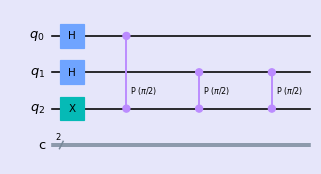

In [ ]:
style = {'backgroundcolor': 'lavender', 'dpi':200, 'subfontsize':10}
PEcircuit.draw(output='mpl', scale=0.8, style=style, filename='/content/drive/My Drive/Colab Notebooks/Quantum_Compute/FourierTransform/2bits_QPE_QiskitEx.png')

In [8]:
def qft_dagger(qc, n):
    """n-qubit inverse qft
       first n qubits will be transformed
       check the qft circuit implementation first 
    """
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [9]:
PEcircuit.barrier()
# Apply inverse QFT
qft_dagger(PEcircuit, 2)
# Measure
PEcircuit.barrier()
for n in range(2):
    PEcircuit.measure(n,n)

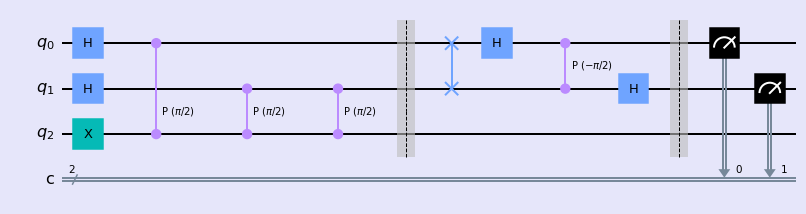

In [ ]:


# PEcircuit.draw(output='mpl', style=style, filename='/content/drive/My Drive/Colab Notebooks/Quantum_Compute/FourierTransform/2bits_QPE_QiskitEx_Full.png')    

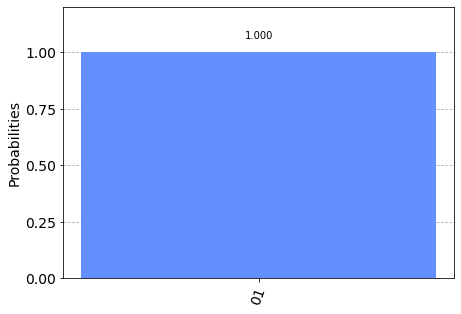

In [10]:
aer_sim = q.Aer.get_backend('aer_simulator')
shots = 2048
t_PEcircuit = q.transpile(PEcircuit, aer_sim)
qobj = q.assemble(t_PEcircuit, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

q.visualization.plot_histogram(answer)

To obtain the result we divide 01 (translates to decimal 1) by $2^2$ i.e 
$$\theta = \frac{1}{4}$$

To check our understanding we can use 3 qubits for the same problem. 

In [11]:
PEcircuit_1 = q.QuantumCircuit(4, 3)
PEcircuit_1.x(3) # this is the eigen state of S gate; in figures above this $\psi$

for qubit in range(3):
    PEcircuit_1.h(qubit)

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        PEcircuit_1.cp(np.pi/2, counting_qubit, 3) # This is CU # QuantumCircuit.cp(theta, control_qubit, target_qubit, label=None, ctrl_state=None)
        # importantly to apply controlled phase rotation we need to know the rotation angle beforehand
    repetitions *= 2 # 2^{n-1} factor
PEcircuit_1.draw()

┌───┐                                                               
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────
     ├───┤ │                                                             
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────
     ├───┤ │        │        │                                           
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────
     ├───┤ │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2) 
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────
     └───┘                                                               
c: 3/════════════════════════════════════════════════════════════════════

In [12]:
PEcircuit_1.barrier()
# Apply inverse QFT
qft_dagger(PEcircuit_1, 3)
# Measure
PEcircuit_1.barrier()
for n in range(3):
    PEcircuit_1.measure(n, n)

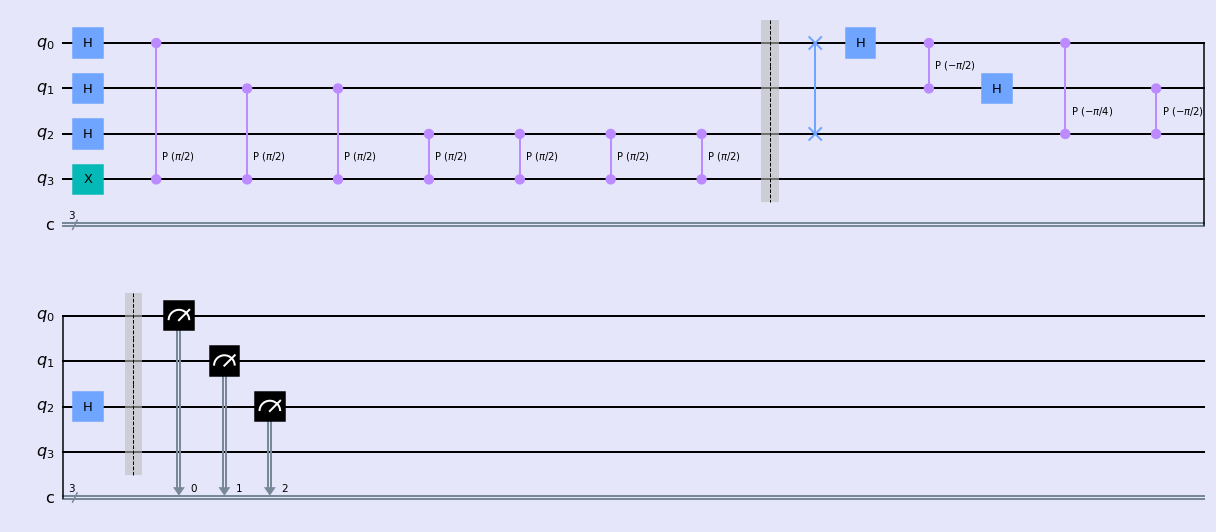

In [ ]:

PEcircuit_1.draw(output='mpl', style=style, filename='/content/drive/My Drive/Colab Notebooks/Quantum_Compute/FourierTransform/3bits_QPE_QiskitEx.png')    

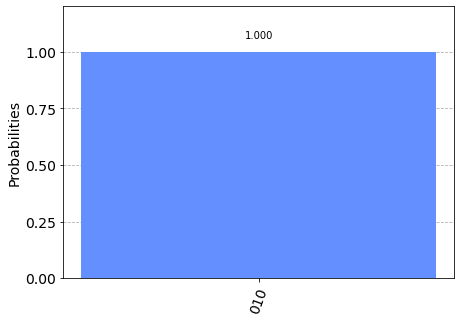

In [13]:
aer_sim = q.Aer.get_backend('aer_simulator')
shots = 2048
t_PEcircuit_1 = q.transpile(PEcircuit_1, aer_sim)
qobj = q.assemble(t_PEcircuit_1, shots=shots)
results_1 = aer_sim.run(qobj).result()
answer_1 = results_1.get_counts()

q.visualization.plot_histogram(answer_1)

010 corresponds to decimal 2, and we have 3 qubits; so 
$$\theta = \frac{2}{2^3} = \frac{1}{4}$$ 

----------------------------------------------------------------

For the case **when $2^n \theta$ is not an integer**, we will get the approximate result. 

Approximation accuracy increases with increasing number of qubits. 

In [ ]:
PEcircuit_1.num_qubits-1

3

In [14]:
def qpe_circ(nq, angle):
  
  """
  generic qpe circuit
  nq: number of qubits
  angle: theta as defined in description
  """

  qc = q.QuantumCircuit(nq+1, nq) # num qubits + eigen state, for measuring we need num qubits = classical bits for measure. 

  qc.x(nq) # apply the not gate to create state 1, i.e. eigen state at the last qubit
  for qubit in range(nq):
    qc.h(qubit)

  repetitions = 1
  for counting_qubit in range(qc.num_qubits - 1): #qc.num_qubits - 1 = nq 
    for i in range(repetitions):
        qc.cp(np.pi *2 * angle, counting_qubit, qc.num_qubits-1); # This is CU # QuantumCircuit.cp(theta, control_qubit, target_qubit, label=None, ctrl_state=None)
        # importantly to apply controlled phase rotation we need to know the rotation angle beforehand
    repetitions *= 2 # 2^{n-1} factor
  qc.barrier()
  qft_dagger(qc, qc.num_qubits-1)
  qc.barrier()
  for n1 in range(qc.num_qubits -1):
    qc.measure(n1, n1)
  return qc

In [15]:
circuit_1 = qpe_circ(3, 1/5)

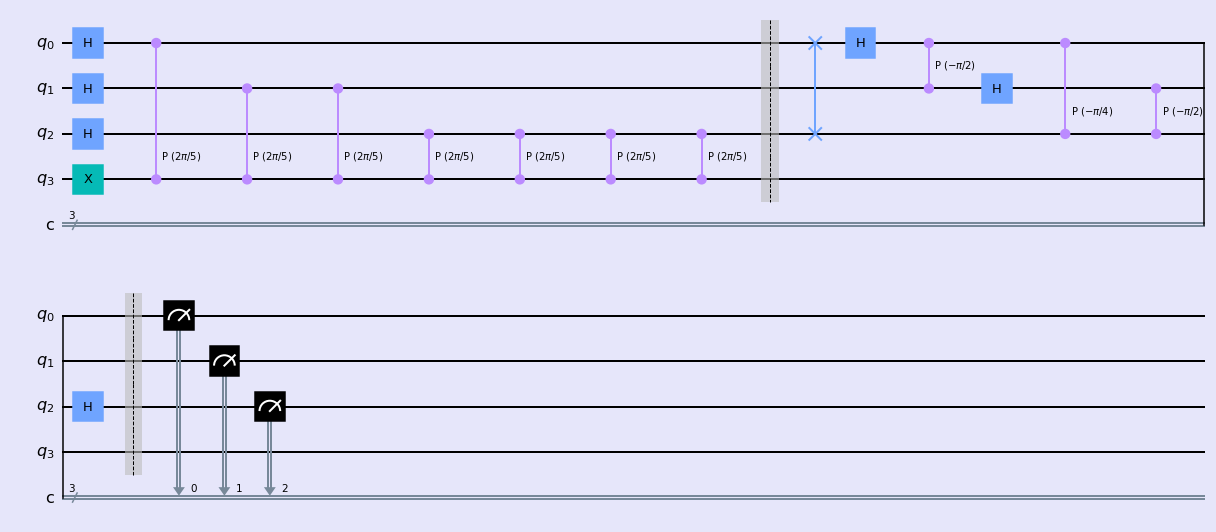

In [ ]:
circuit_1.draw(output='mpl', style=style, filename='/content/drive/My Drive/Colab Notebooks/Quantum_Compute/FourierTransform/3bits_QPE_QiskitEx_NonInt_Theta.png')

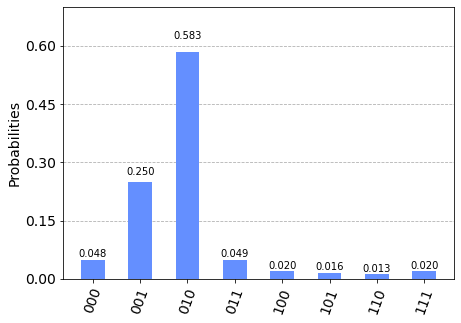

In [16]:
aer_sim = q.Aer.get_backend('aer_simulator')
shots = 2048
t_circuit_1 = q.transpile(circuit_1, aer_sim)
qobj = q.assemble(t_circuit_1, shots=shots)
results_c1 = aer_sim.run(qobj).result()
answer_c1 = results_c1.get_counts()

q.visualization.plot_histogram(answer_c1)

We find $001\, (1)$ i.e.  and $010\, (2)$ as possible results i.e. 

$$\theta = \frac{1}{2^3} \, ;\, \theta = \frac{2}{2^3}\, , $$ between $0.125$ with probability $(25\%)$ and $0.25$ with probability $(59\%)$. 

Our real result is $$θ = \frac{1}{5} = 0.20\, .$$. 

Let's increase the number of qubits, from 3 to 5

In [17]:
circuit_2 = qpe_circ(5, 1/5)

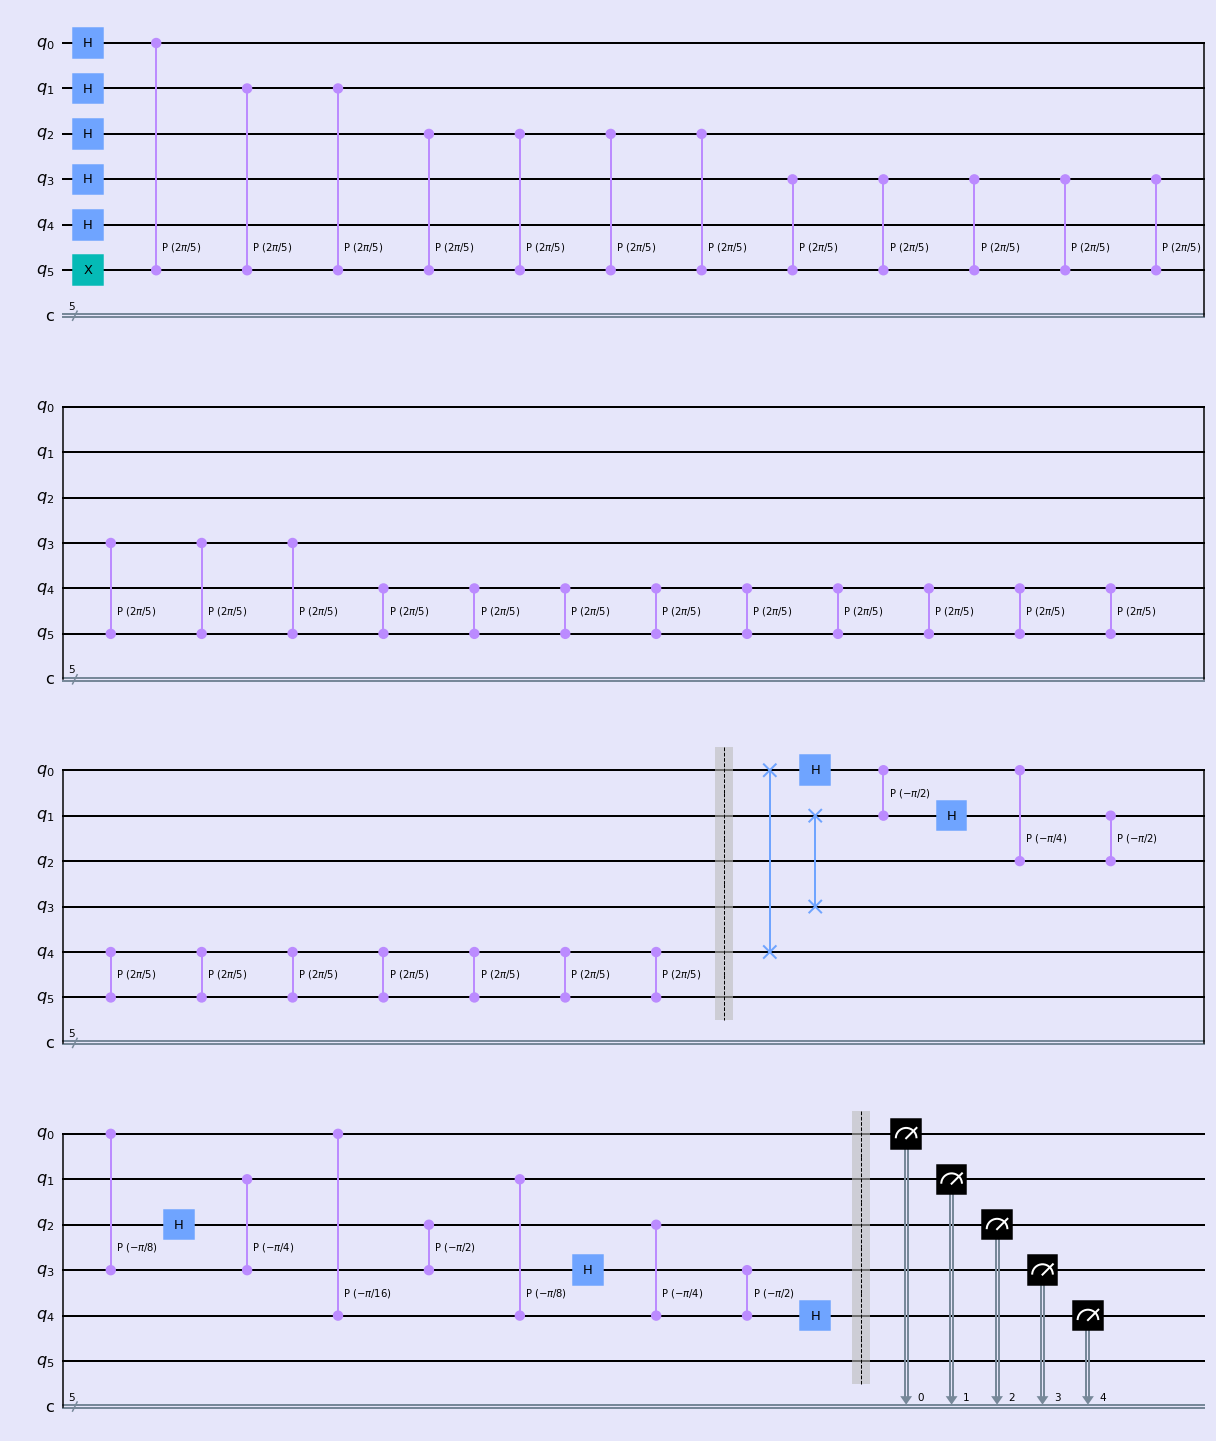

In [ ]:
circuit_2.draw(output='mpl', style=style, filename='/content/drive/My Drive/Colab Notebooks/Quantum_Compute/FourierTransform/5bits_QPE_QiskitEx_NonInt_Theta.png')

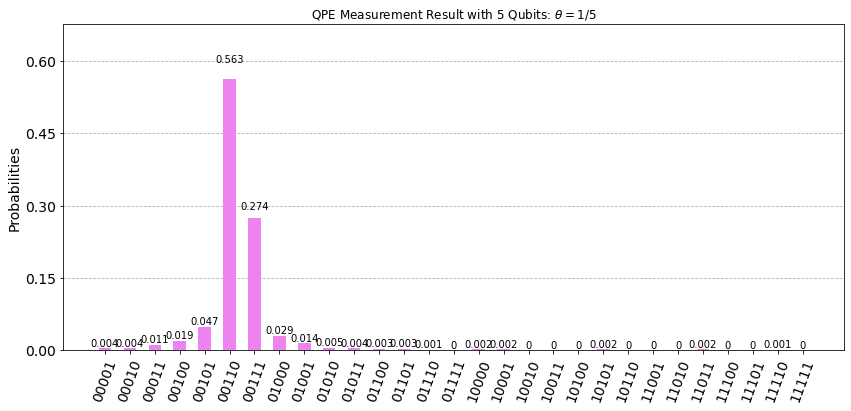

In [34]:
aer_sim = q.Aer.get_backend('aer_simulator')
shots = 2048
t_circuit_2 = q.transpile(circuit_2, aer_sim)
qobj = q.assemble(t_circuit_2, shots=shots)
results_c2 = aer_sim.run(qobj).result()
answer_c2 = results_c2.get_counts()

fig, ax = plt.subplots(figsize=(14, 6))
q.visualization.plot_histogram(answer_c2, figsize=(14, 6), color='violet', title=r'QPE Measurement Result with 5 Qubits: $\theta = 1/5$', ax=ax)
fig.savefig('/content/drive/My Drive/Colab Notebooks/Quantum_Compute/FourierTransform/5bits_QPE_QiskitEx_NonInt_Theta_Histogram.png', dpi=250)

In [ ]:
for k, v  in answer_c2.items():
  print(k, v)

11001 1
10011 1
10000 1
10101 1
11100 5
11110 6
01101 5
00001 7
01100 10
11011 5
11010 1
00111 502
00110 1186
00011 16
00100 28
00000 3
01011 8
01110 4
00101 107
01001 22
01000 76
00010 11
10001 3
01010 17
01111 4
10111 2
11000 1
10100 2
11101 6
10110 4
11111 3


Best result is obtained for $00110\, (6)$ and the corresponding 
$$θ = \frac{6}{32} = 0.1875$$ and the next possible result 
$$ θ = \frac{7}{32} = 0.21875 $$  

These two values are much closer to $θ = \frac{1}{5}$. 